In [2]:
from google.colab import files


uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

Data=pd.read_csv('diabetes_data_upload.csv')

In [4]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns

X = Data.iloc[:,Data.columns != 'Outcome']
y = Data.Outcome

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
Y_pred=dt.predict(X_test)
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [6]:
y_test

342    1
260    1
4      1
494    0
17     1
      ..
251    1
173    1
180    1
85     1
466    0
Name: Outcome, Length: 104, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
dt_ac=accuracy_score(y_test,Y_pred)
dt_ac
print('Accuracy: %.3f' % dt_ac)

Accuracy: 0.952


In [ ]:
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, Y_pred))

Precision: 0.968


In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, Y_pred))

Recall: 0.953


In [ ]:
from sklearn.metrics import f1_score
print('F1score: %.3f' % f1_score(y_test, Y_pred))

F1score: 0.961


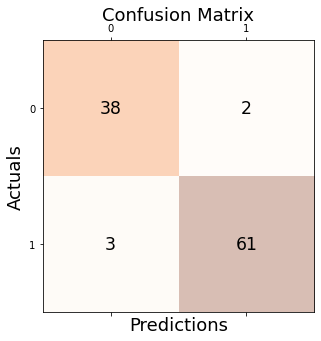

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=y_test, y_pred=Y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

[Text(0.7387820512820513, 0.9666666666666667, 'X[0] <= 0.5\ngini = 0.473\nsamples = 416\nvalue = [160, 256]'),
 Text(0.6057692307692307, 0.9, 'X[1] <= 0.5\ngini = 0.414\nsamples = 212\nvalue = [150, 62]'),
 Text(0.46794871794871795, 0.8333333333333334, 'X[10] <= 0.5\ngini = 0.329\nsamples = 183\nvalue = [145, 38]'),
 Text(0.3974358974358974, 0.7666666666666667, 'X[2] <= 0.5\ngini = 0.26\nsamples = 150\nvalue = [127, 23]'),
 Text(0.3333333333333333, 0.7, 'X[8] <= 0.5\ngini = 0.204\nsamples = 130\nvalue = [115, 15]'),
 Text(0.28205128205128205, 0.6333333333333333, 'X[7] <= 0.5\ngini = 0.167\nsamples = 120\nvalue = [109, 11]'),
 Text(0.2564102564102564, 0.5666666666666667, 'X[9] <= 0.5\ngini = 0.259\nsamples = 72\nvalue = [61, 11]'),
 Text(0.23076923076923078, 0.5, 'X[13] <= 0.5\ngini = 0.205\nsamples = 69\nvalue = [61, 8]'),
 Text(0.20512820512820512, 0.43333333333333335, 'X[11] <= 0.5\ngini = 0.185\nsamples = 68\nvalue = [61, 7]'),
 Text(0.1794871794871795, 0.36666666666666664, 'X[6] <=

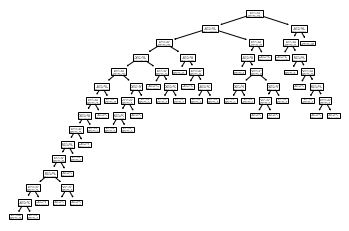

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
tree.plot_tree(dt)

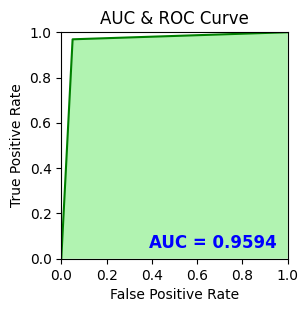

In [8]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, Y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, Y_pred)

plt.figure(figsize=(4, 3), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

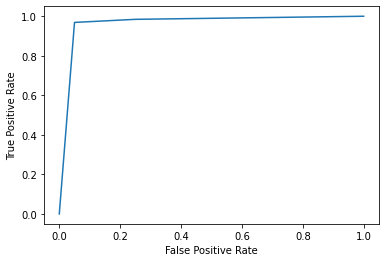

In [7]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()